In [1]:
from google.colab import files

# upload file in colab environment
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load Data
train_df = pd.read_csv('train.csv')
X = train_df.drop(columns=['price_range']).values
y = train_df['price_range'].values

# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

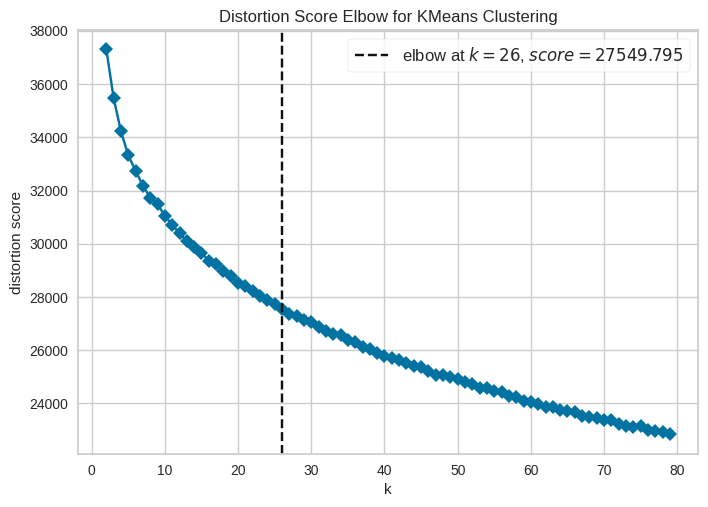

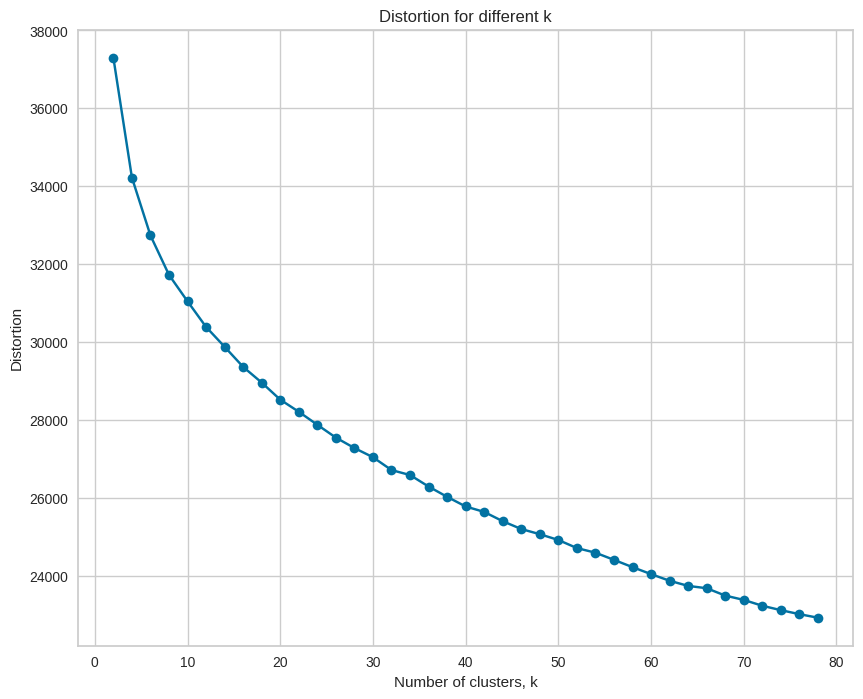

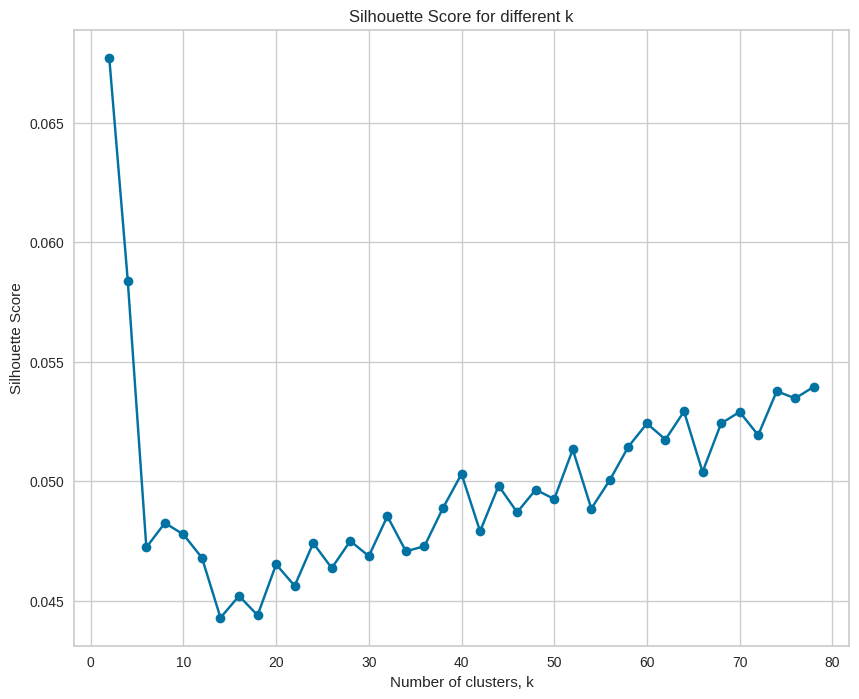

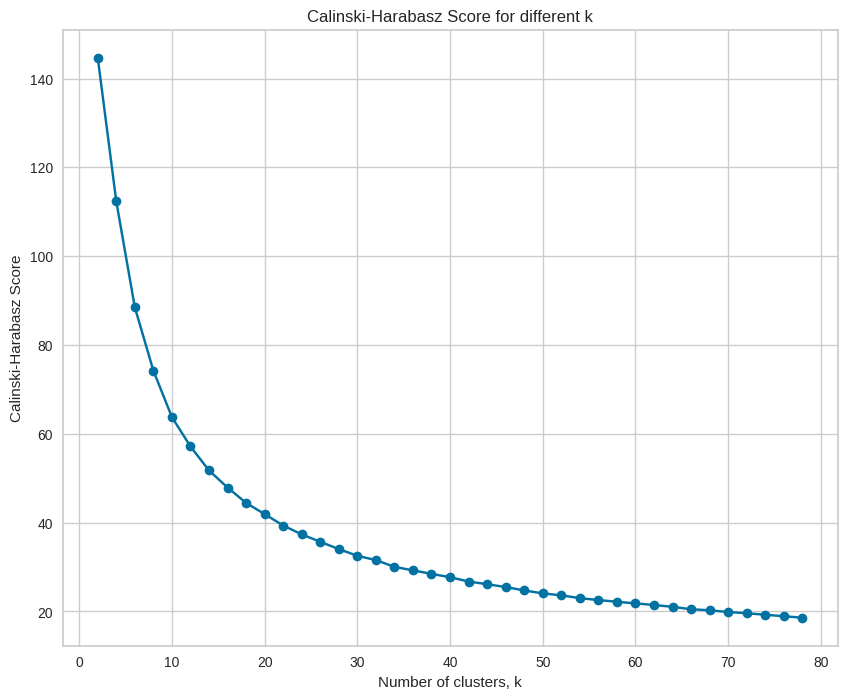

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer

# Use KElbowVisualizer to find the optimal number of clusters
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 80), metric='distortion', timings=False)
visualizer.fit(X_scaled)
visualizer.show()

# Indicators for clusters
distortions = []
silhouettes = []
calinskis = []
K = range(2, 80, 2)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    distortions.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))
    calinskis.append(calinski_harabasz_score(X_scaled, labels))

# Plot analysis
plt.figure(figsize=(10, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Distortion')
plt.title('Distortion for different k')

plt.figure(figsize=(10, 8))
plt.plot(K, silhouettes, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')

plt.figure(figsize=(10, 8))
plt.plot(K, calinskis, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for different k')


plt.show()

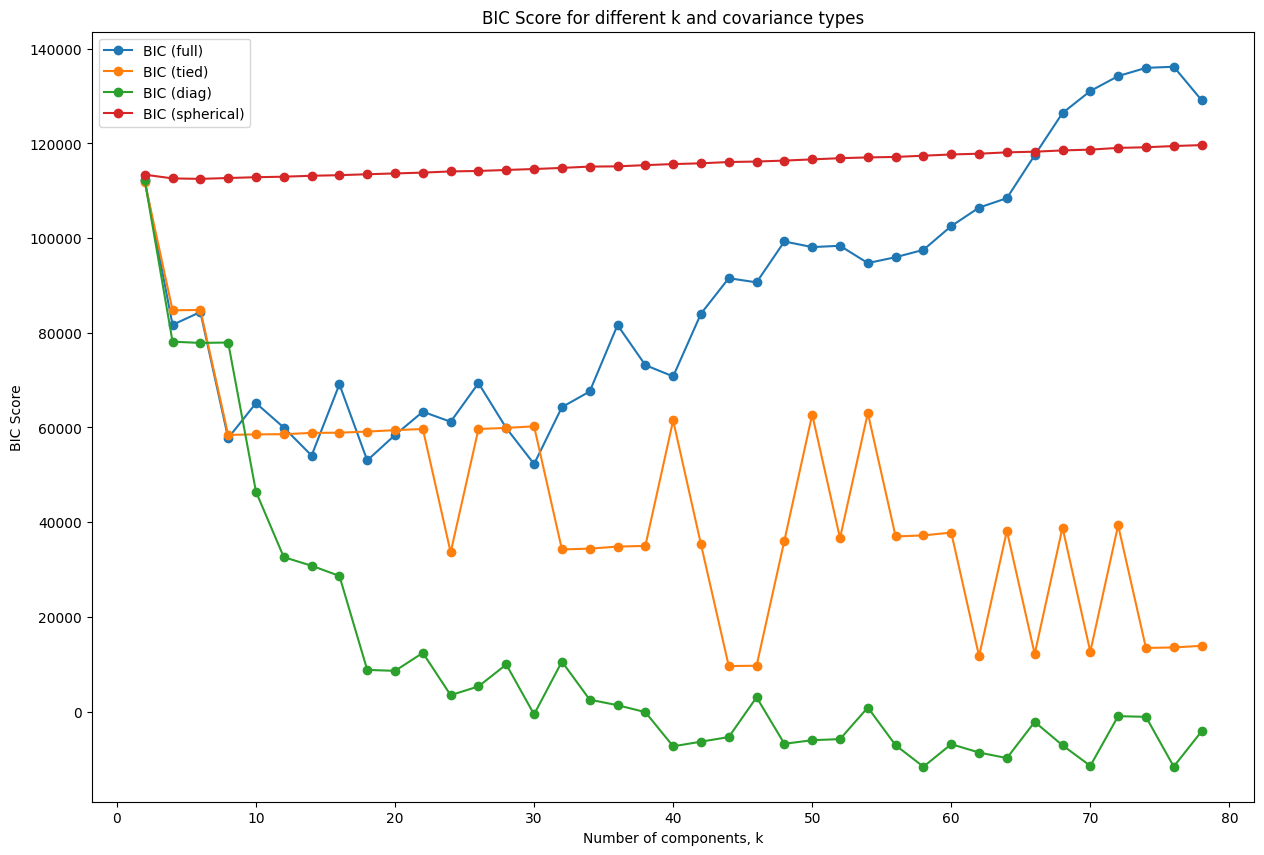

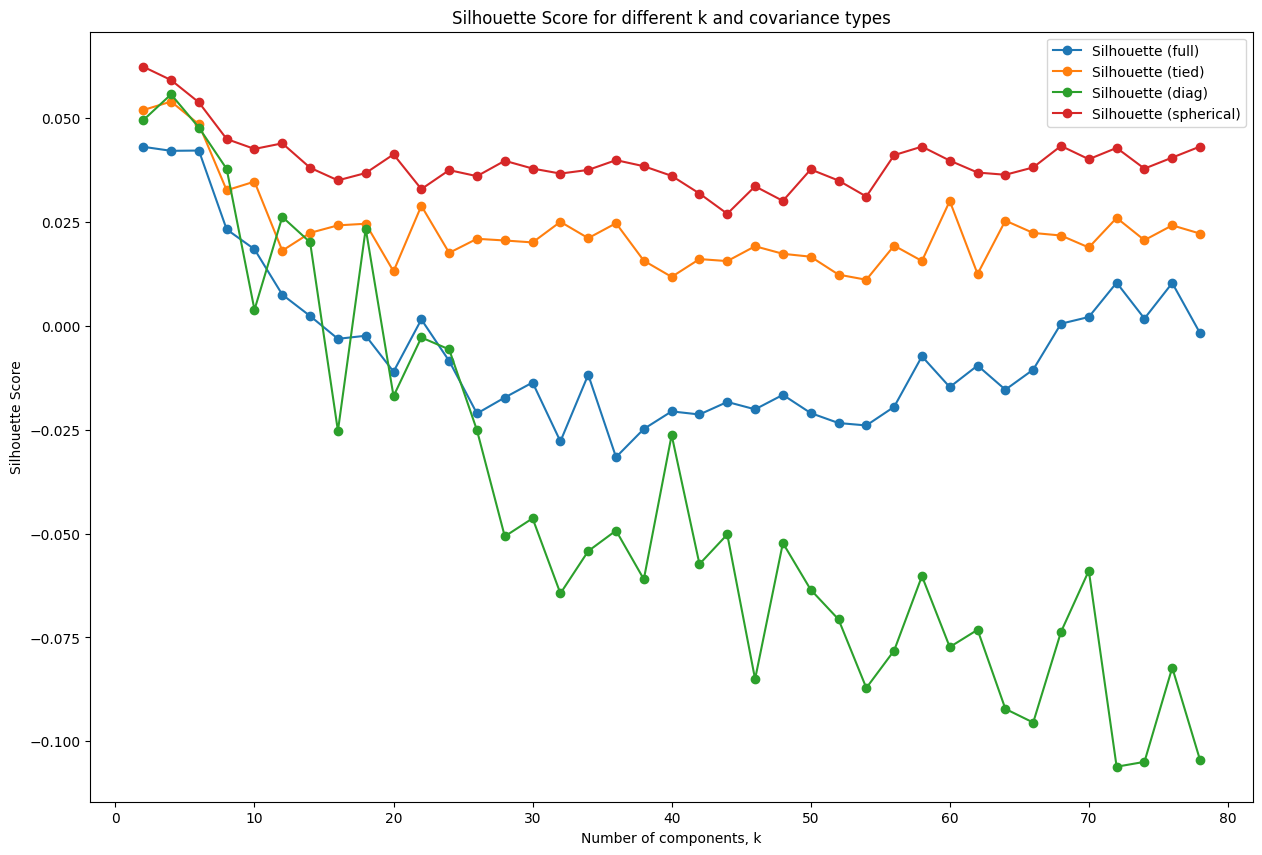

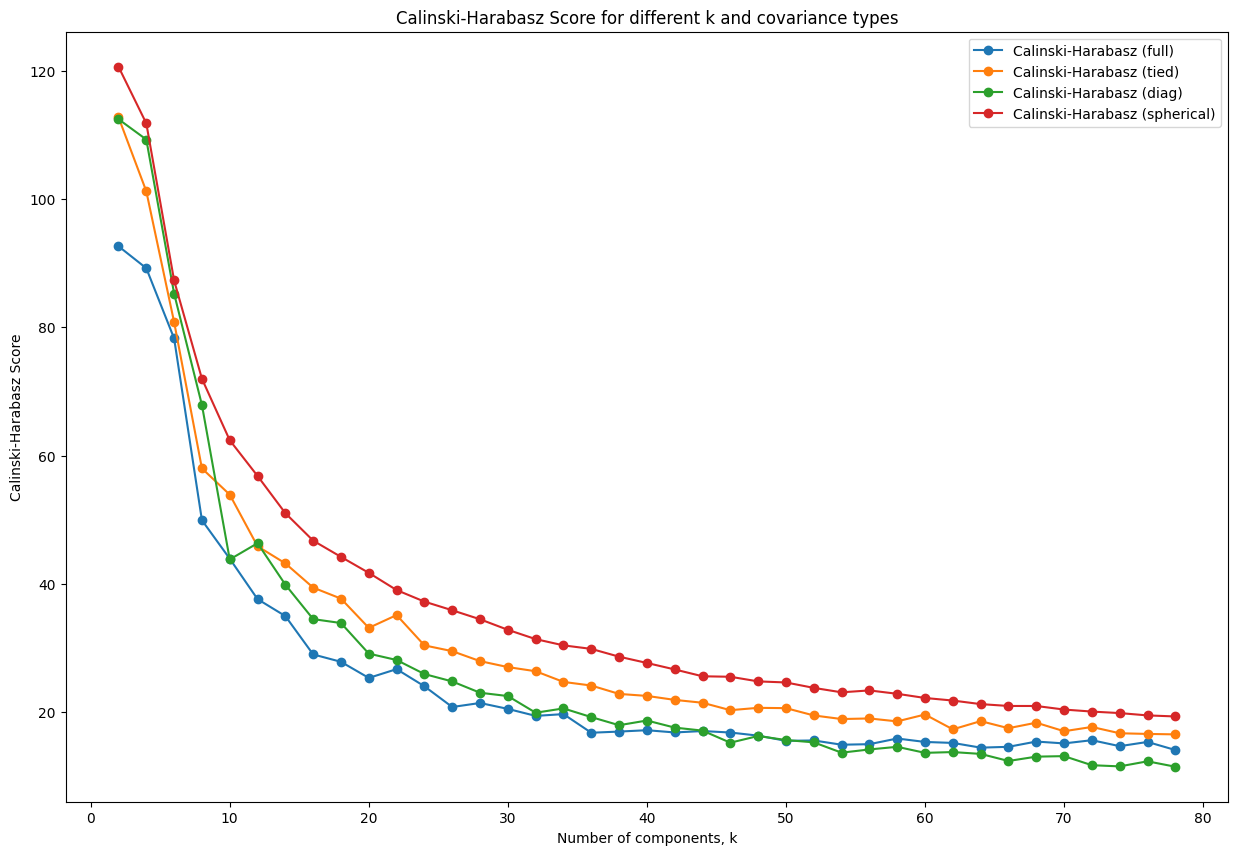

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score

covariance_types = ['full', 'tied', 'diag', 'spherical']
bic_scores = {cov_type: [] for cov_type in covariance_types}
silhouettes = {cov_type: [] for cov_type in covariance_types}
calinskis = {cov_type: [] for cov_type in covariance_types}
K = range(2, 80, 2)

for cov_type in covariance_types:
    for k in K:
        gmm = GaussianMixture(n_components=k, covariance_type=cov_type, random_state=42)
        gmm.fit(X_scaled)
        labels = gmm.predict(X_scaled)

        bic_scores[cov_type].append(gmm.bic(X_scaled))
        silhouettes[cov_type].append(silhouette_score(X_scaled, labels))
        calinskis[cov_type].append(calinski_harabasz_score(X_scaled, labels))

# Plotting BIC scores and other indicators
plt.figure(figsize=(15, 10))
for cov_type in covariance_types:
    plt.plot(K, bic_scores[cov_type], marker='o', label=f'BIC ({cov_type})')
plt.xlabel('Number of components, k')
plt.ylabel('BIC Score')
plt.title('BIC Score for different k and covariance types')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
for cov_type in covariance_types:
    plt.plot(K, silhouettes[cov_type], marker='o', label=f'Silhouette ({cov_type})')
plt.xlabel('Number of components, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k and covariance types')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
for cov_type in covariance_types:
    plt.plot(K, calinskis[cov_type], marker='o', label=f'Calinski-Harabasz ({cov_type})')
plt.xlabel('Number of components, k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for different k and covariance types')
plt.legend()
plt.show()


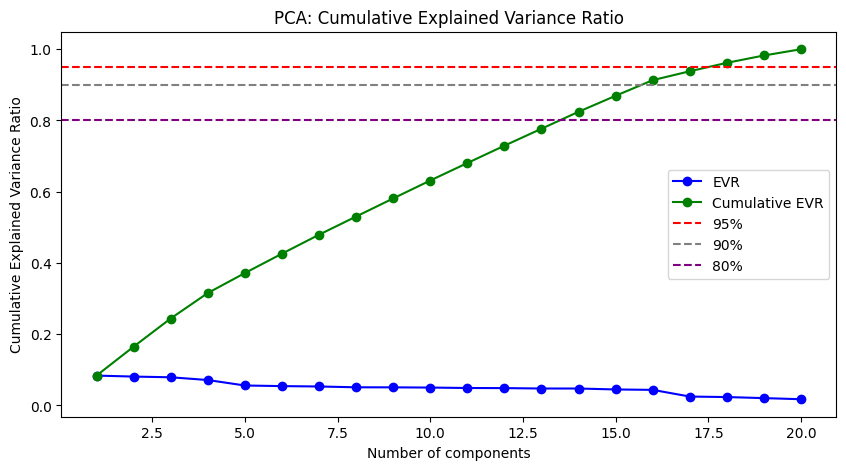

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'b-o', label='EVR')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio (EVR)')
plt.title('PCA: Explained Variance Ratio')
plt.legend()
plt.grid(False)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'g-o', label='Cumulative EVR')
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')
plt.axhline(y=0.90, color='gray', linestyle='--', label='90%')
plt.axhline(y=0.80, color='purple', linestyle='--', label='80%')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.legend()

plt.show()

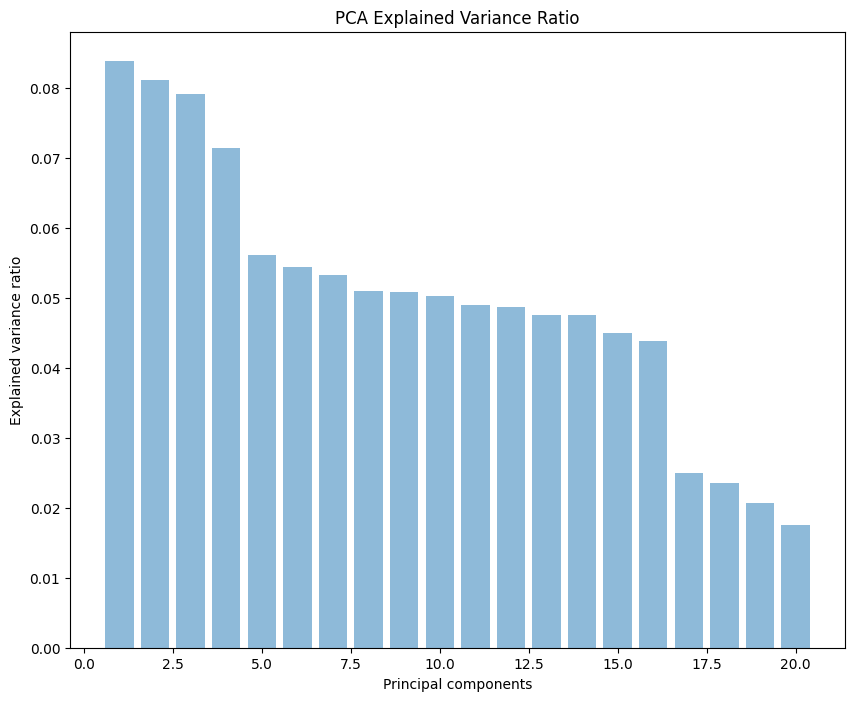

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the proportion of explained variance
plt.figure(figsize=(10, 8))

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('PCA Explained Variance Ratio')


plt.show()

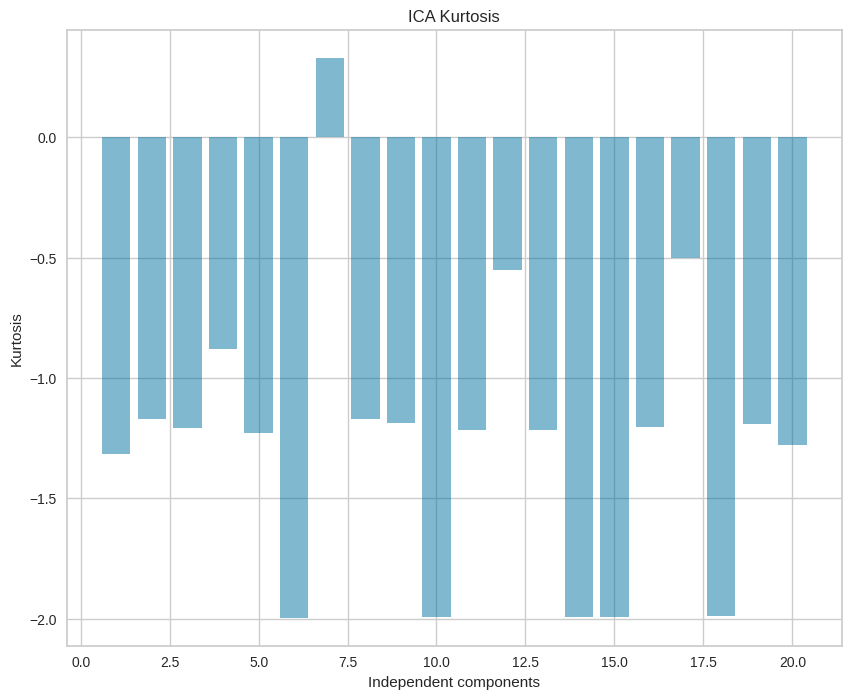

In [ ]:
from sklearn.decomposition import FastICA
import scipy.stats as stats

# ICA
ica = FastICA(random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Calculate kurtosis
kurtosis = stats.kurtosis(X_ica)

# Plot kurtosis
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(kurtosis) + 1), kurtosis, alpha=0.5, align='center')
plt.xlabel('Independent components')
plt.ylabel('Kurtosis')
plt.title('ICA Kurtosis')

plt.show()


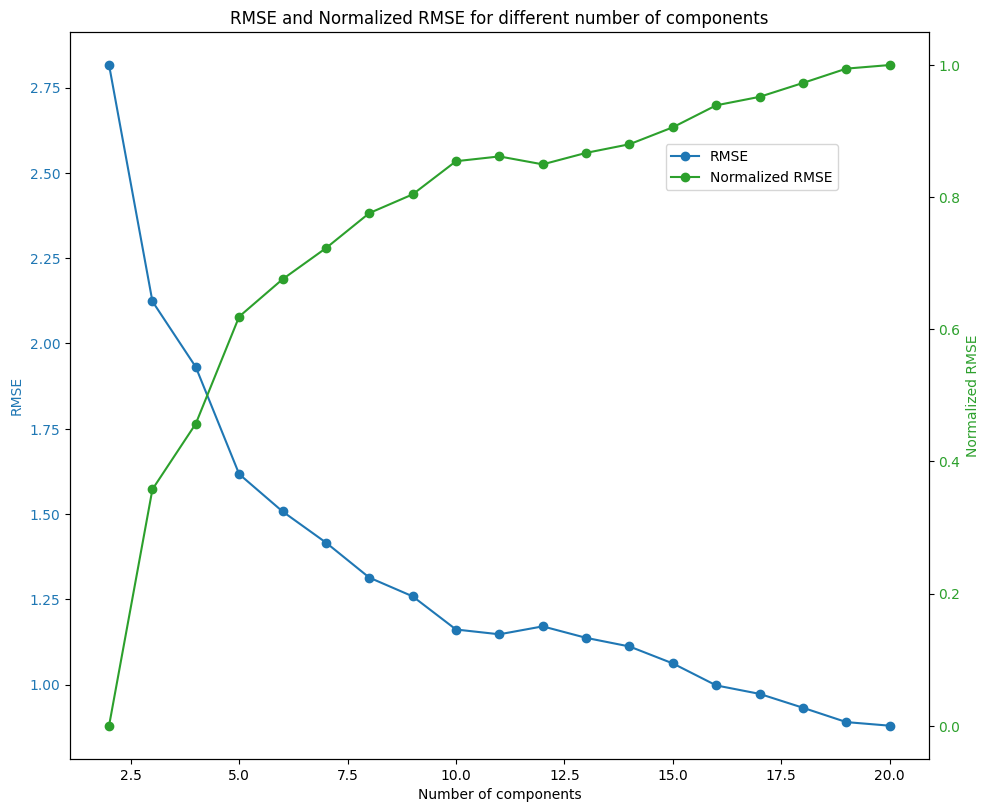

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error


rmse_scores = []
K = range(2, X_scaled.shape[1] + 1)

for k in K:
    rp = GaussianRandomProjection(n_components=k, random_state=42)
    X_projected = rp.fit_transform(X_scaled)
    X_approx = np.dot(X_projected, rp.components_)

    rmse = np.sqrt(mean_squared_error(X_scaled, X_approx))
    rmse_scores.append(rmse)

# Normalized RMSE
rmse_max = max(rmse_scores)
rmse_min = min(rmse_scores)
normalized_rmse = [(rmse - rmse_max) / (rmse_min - rmse_max) for rmse in rmse_scores]


fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:blue'
ax1.set_xlabel('Number of components')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(K, rmse_scores, marker='o', color=color, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Normalized RMSE', color=color)
ax2.plot(K, normalized_rmse, marker='o', color=color, label='Normalized RMSE')
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

fig.tight_layout()
plt.title('RMSE and Normalized RMSE for different number of components')

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

plt.show()

Data Rank: 20


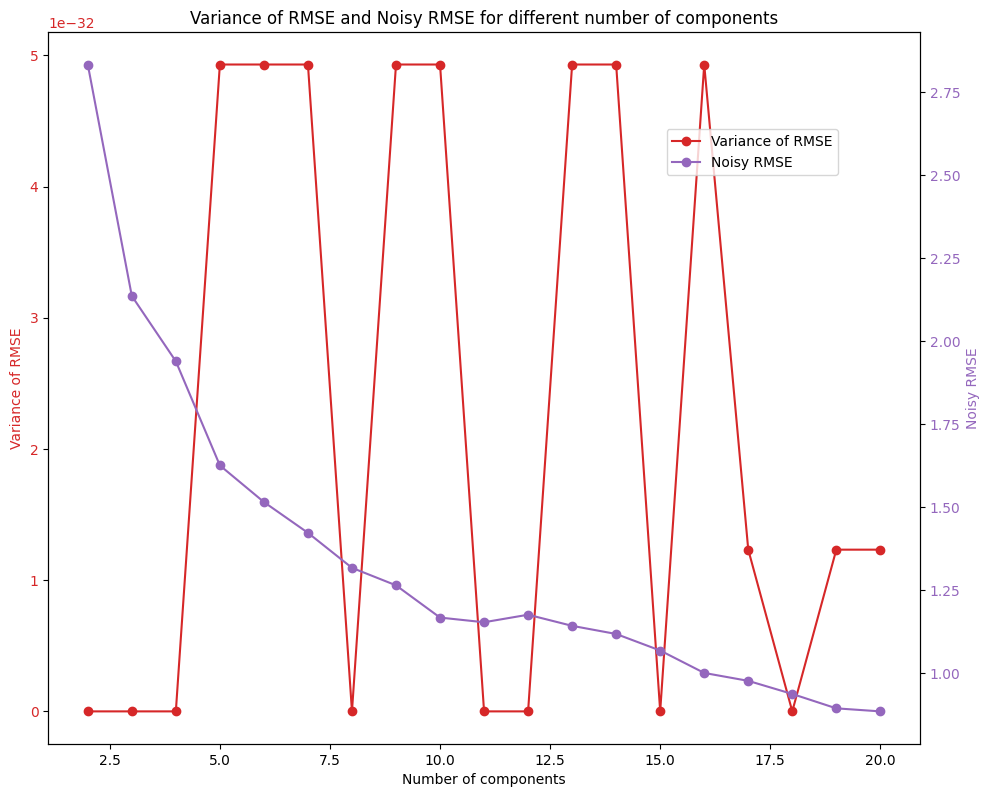

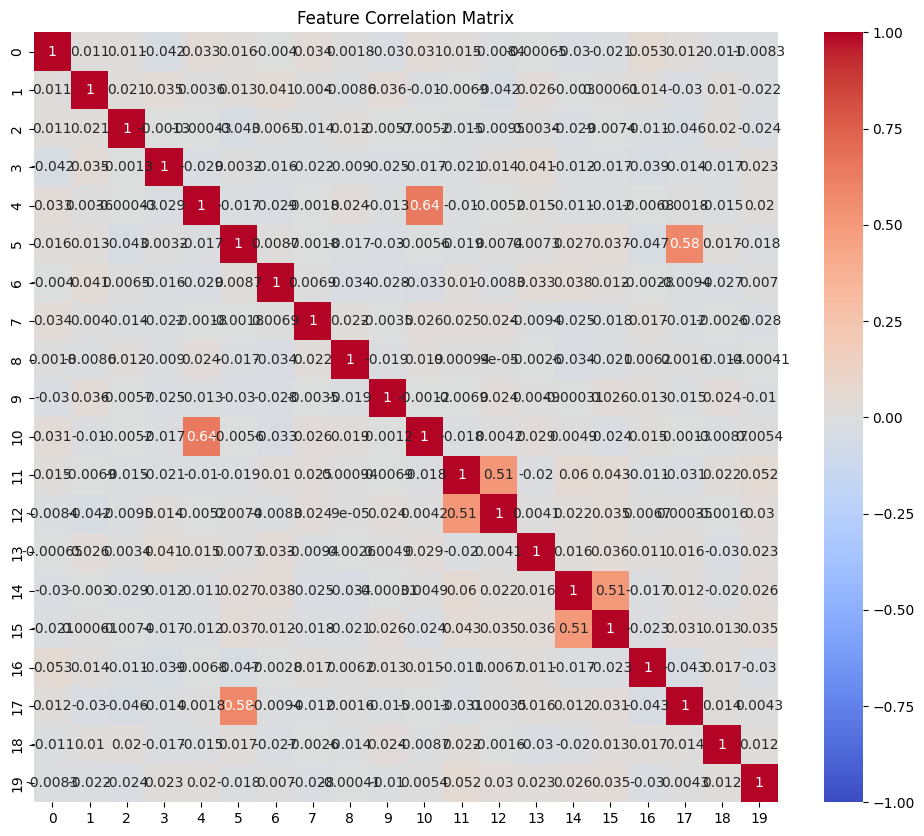

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from numpy.linalg import matrix_rank
import seaborn as sns


rmse_scores = []
variances = []
noisy_rmse_scores = []
K = range(2, X_scaled.shape[1] + 1)

data_rank = matrix_rank(X_scaled)
print(f'Data Rank: {data_rank}')

for k in K:
    rp = GaussianRandomProjection(n_components=k, random_state=42)

    rmse_list = []
    for _ in range(10):
        X_projected = rp.fit_transform(X_scaled)
        X_approx = np.dot(X_projected, rp.components_)
        rmse = np.sqrt(mean_squared_error(X_scaled, X_approx))
        rmse_list.append(rmse)

    rmse_scores.append(np.mean(rmse_list))
    variances.append(np.var(rmse_list))

    noise = np.random.normal(0, 0.1, X_scaled.shape)
    X_noisy = X_scaled + noise
    X_projected_noisy = rp.fit_transform(X_noisy)
    X_approx_noisy = np.dot(X_projected_noisy, rp.components_)
    noisy_rmse = np.sqrt(mean_squared_error(X_noisy, X_approx_noisy))
    noisy_rmse_scores.append(noisy_rmse)

# Normalized RMSE
rmse_max = max(rmse_scores)
rmse_min = min(rmse_scores)
normalized_rmse = [(rmse - rmse_max) / (rmse_min - rmse_max) for rmse in rmse_scores]

fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Variance of RMSE', color=color)
ax1.plot(K, variances, marker='o', color=color, label='Variance of RMSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Noisy RMSE', color=color)
ax2.plot(K, noisy_rmse_scores, marker='o', color=color, label='Noisy RMSE')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Variance of RMSE and Noisy RMSE for different number of components')
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
plt.show()

correlation_matrix = np.corrcoef(X_scaled, rowvar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.title('Feature Correlation Matrix')
plt.show()


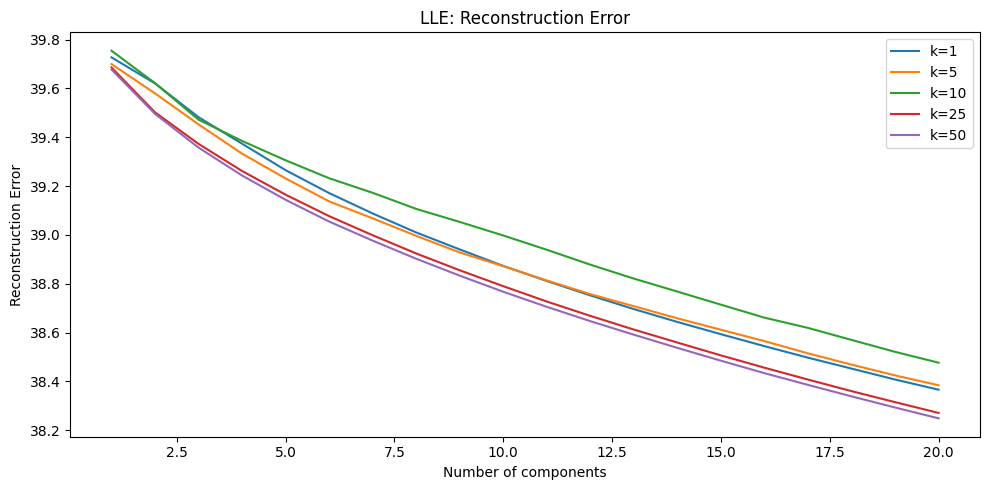

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics import mean_squared_error, pairwise_distances

reconstruction_errors = {}
neighbors = [1, 5, 10, 25, 50]

for n_neighbors in neighbors:
    errors = []
    for n_components in range(1, X_scaled.shape[1] + 1):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, eigen_solver='dense')
        X_lle = lle.fit_transform(X_scaled)
        error = mean_squared_error(pairwise_distances(X_scaled), pairwise_distances(X_lle))
        errors.append(error)
    reconstruction_errors[n_neighbors] = errors

plt.figure(figsize=(10, 5))
for n_neighbors, errors in reconstruction_errors.items():
    plt.plot(range(1, X_scaled.shape[1] + 1), errors, label=f'k={n_neighbors}')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('LLE: Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show()


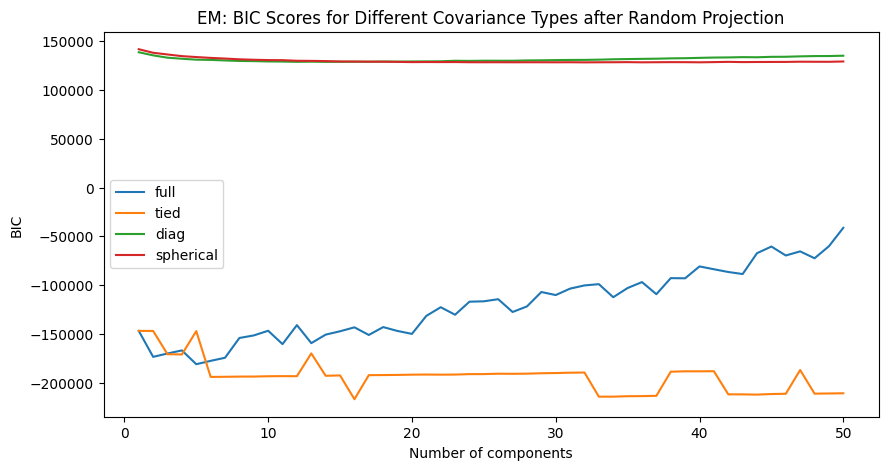

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler

# Assume X is your original dataset
X_scaled = StandardScaler().fit_transform(X)  # Standardize the data

# Apply Random Projection to reduce dimensionality
n_random_components = 30
rp = GaussianRandomProjection(n_components=n_random_components, random_state=42)
X_projected = rp.fit_transform(X_scaled)

components_range = range(1, 51)
bic_scores = {
    'full': [],
    'tied': [],
    'diag': [],
    'spherical': []
}

for covariance_type in bic_scores.keys():
    for n_components in components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        gmm.fit(X_projected)
        bic_scores[covariance_type].append(gmm.bic(X_projected))

plt.figure(figsize=(10, 5))
for covariance_type, scores in bic_scores.items():
    plt.plot(components_range, scores, label=covariance_type)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('EM: BIC Scores for Different Covariance Types after Random Projection')
plt.legend()
plt.show()


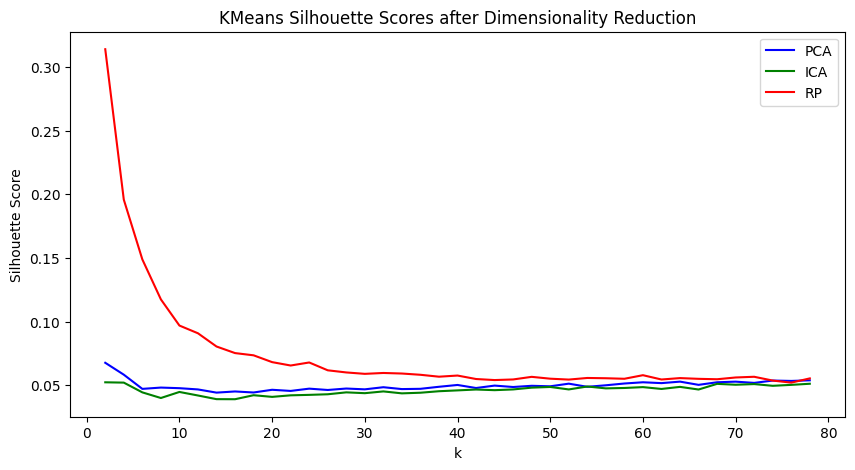

In [10]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import FastICA, PCA
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt


ica = FastICA(random_state=42)
X_ica = ica.fit_transform(X_scaled)

pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

k_values = range(2, 80, 2)
silhouette_scores_pca = []
silhouette_scores_ica = []
silhouette_scores_rp = []

for k in k_values:
    rp = GaussianRandomProjection(n_components=k, random_state=42)
    X_projected = rp.fit_transform(X_scaled)
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_ica = KMeans(n_clusters=k, random_state=42)
    kmeans_rp = KMeans(n_clusters=k, random_state=42)

    kmeans_pca.fit(X_pca)
    kmeans_ica.fit(X_ica)
    kmeans_rp.fit(X_projected)

    silhouette_scores_pca.append(silhouette_score(X_pca, kmeans_pca.labels_))
    silhouette_scores_ica.append(silhouette_score(X_ica, kmeans_ica.labels_))
    silhouette_scores_rp.append(silhouette_score(X_projected, kmeans_rp.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores_pca, 'b-', label='PCA')
plt.plot(k_values, silhouette_scores_ica, 'g-', label='ICA')
plt.plot(k_values, silhouette_scores_rp, 'r-', label='RP')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Scores after Dimensionality Reduction')
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import Isomap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def train_and_evaluate(X_train, X_test, y_train, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42, solver='adam')
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_f1 = f1_score(y_train, clf.predict(X_train), average='weighted')
    test_f1 = f1_score(y_test, clf.predict(X_test), average='weighted')
    train_iters = clf.n_iter_
    test_start_time = time.time()
    clf.predict(X_test)
    test_time = time.time() - test_start_time
    return train_f1, test_f1, train_time, train_iters, test_time

results = []

# Base NN
start_time = time.time()
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train, X_test, y_train, y_test)
prep_time = time.time() - start_time - train_time
results.append(['Base', train_f1, test_f1, prep_time, train_time, prep_time + train_time, train_iters, test_time])

# PCA
start_time = time.time()
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
prep_time_pca = time.time() - start_time
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test)
results.append(['PCA', train_f1, test_f1, prep_time_pca, train_time, prep_time_pca + train_time, train_iters, test_time])

# ICA
start_time = time.time()
ica = FastICA(n_components=20, random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)
prep_time_ica = time.time() - start_time
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train_ica, X_test_ica, y_train, y_test)
results.append(['ICA', train_f1, test_f1, prep_time_ica, train_time, prep_time_ica + train_time, train_iters, test_time])

# RP
start_time = time.time()
rp = GaussianRandomProjection(n_components=13, random_state=42)
X_train_rp = rp.fit_transform(X_train)
X_test_rp = rp.transform(X_test)
prep_time_rp = time.time() - start_time
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train_rp, X_test_rp, y_train, y_test)
results.append(['RP', train_f1, test_f1, prep_time_rp, train_time, prep_time_rp + train_time, train_iters, test_time])


df_results = pd.DataFrame(results, columns=['Algorithm', 'Train F1', 'Test F1', 'Prep Time', 'Train Time', 'Adj Train Time', 'Train Iters', 'Test Time'])
print(df_results)

  Algorithm  Train F1   Test F1  Prep Time  Train Time  Adj Train Time  \
0      Base  1.000000  0.920366   0.010950    2.499788        2.510737   
1       PCA  1.000000  0.930111   0.016637    2.260721        2.277358   
2       ICA  0.986853  0.977499   0.333807    8.125089        8.458896   
3        RP  1.000000  0.454143   0.001559    8.341432        8.342992   

   Train Iters  Test Time  
0          295   0.000743  
1          260   0.000803  
2         1000   0.001088  
3         1000   0.000709  


In [ ]:
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import Isomap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def train_and_evaluate(X_train, X_test, y_train, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42, solver='adam')
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_f1 = f1_score(y_train, clf.predict(X_train), average='weighted')
    test_f1 = f1_score(y_test, clf.predict(X_test), average='weighted')
    train_iters = clf.n_iter_
    test_start_time = time.time()
    clf.predict(X_test)
    test_time = time.time() - test_start_time
    return train_f1, test_f1, train_time, train_iters, test_time

results = []

# Base NN
start_time = time.time()
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train, X_test, y_train, y_test)
prep_time = time.time() - start_time - train_time
results.append(['Base', train_f1, test_f1, prep_time, train_time, prep_time + train_time, train_iters, test_time])

# PCA
start_time = time.time()
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
prep_time_pca = time.time() - start_time
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test)
results.append(['PCA', train_f1, test_f1, prep_time_pca, train_time, prep_time_pca + train_time, train_iters, test_time])

# ICA
start_time = time.time()
ica = FastICA(n_components=20, random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)
prep_time_ica = time.time() - start_time
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train_ica, X_test_ica, y_train, y_test)
results.append(['ICA', train_f1, test_f1, prep_time_ica, train_time, prep_time_ica + train_time, train_iters, test_time])

# RP
start_time = time.time()
rp = GaussianRandomProjection(n_components=13, random_state=42)
X_train_rp = rp.fit_transform(X_train)
X_test_rp = rp.transform(X_test)
prep_time_rp = time.time() - start_time
train_f1, test_f1, train_time, train_iters, test_time = train_and_evaluate(X_train_rp, X_test_rp, y_train, y_test)
results.append(['RP', train_f1, test_f1, prep_time_rp, train_time, prep_time_rp + train_time, train_iters, test_time])



df_results = pd.DataFrame(results, columns=['Algorithm', 'Train F1', 'Test F1', 'Prep Time', 'Train Time', 'Adj Train Time', 'Train Iters', 'Test Time'])
print(df_results)

  Algorithm  Train F1   Test F1  Prep Time  Train Time  Adj Train Time  \
0      Base  1.000000  0.920366   0.008459    2.475934        2.484393   
1       PCA  1.000000  0.930111   0.006952    2.280533        2.287486   
2       ICA  0.986853  0.977499   0.273299    8.157933        8.431232   
3        RP  1.000000  0.454143   0.001507    8.138953        8.140460   

   Train Iters  Test Time  
0          295   0.000720  
1          260   0.000736  
2         1000   0.000736  
3         1000   0.000688  
